## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
(df['converted'] == 1).mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.groupby(['group', 'landing_page']).size()

group      landing_page
control    new_page          1928
           old_page        145274
treatment  new_page        145311
           old_page          1965
dtype: int64

In [7]:
df.groupby(['group', 'landing_page']).size()['control','new_page'] + df.groupby(['group', 'landing_page']).size()['treatment','old_page']

3893

f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Remove these rows

df2 = df.drop(df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')].index)
df2 = df2.drop(df2[(df2['group'] != 'treatment') & (df2['landing_page'] == 'new_page')].index)
df2.shape

(290585, 5)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2 = df2.drop(2893)
df2.shape[0]

290584

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
(df2['converted'] == 1).mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
p_control = df2.groupby(['group', 'converted']).size()['control', 1]/df2.groupby('group').size()['control']
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
p_exp = df2.groupby(['group', 'converted']).size()['treatment', 1]/df2.groupby('group').size()['treatment']
p_exp

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
(df['landing_page'] == 'new_page').mean()

0.5

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**
> **There doesn't seem to be enough evidence that new treatment page if leading to more conversions. Infact the proportions of conversions through the new treatment page is somewhat lesser than the old control page.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

> $$H_{0}: p_{old} >= p_{new}$$
> $$H_{1}: p_{old} < p_{new}$$

> $$or$$

> $$H_{0}: p_{old} - p_{new} >= 0$$
> $$H_{1}: p_{old} - p_{new} < 0$$

> $$or$$

> $$H_{0}: p_{old} = p_{new}$$
> $$H_{1}: p_{old} != p_{new}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
p_new = (df2['converted'] == 1).mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old = (df2['converted'] == 1).mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
new = df2[df2['group'] == 'treatment']
n_new = new.shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
old = df2[df2['group'] == 'control']
n_old = old.shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([0,1], size = (1, n_new), p = [1 - p_new, p_new])
new_page_converted.mean()

0.11990227788865185

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice([0,1], size = (1, n_old), p = [1 - p_old, p_old])
old_page_converted.mean()

0.1195189779313573

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
new_page_converted.mean() - old_page_converted.mean()

0.0003832999572945528

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([0,1], size = (1, n_new), p = [1 - p_new, p_new])
    old_page_converted = np.random.choice([0,1], size = (1, n_old), p = [1 - p_old, p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

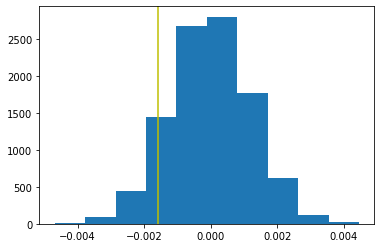

In [27]:
ab_diff = p_exp - p_control

plt.hist(p_diffs);
plt.axvline(x = ab_diff, color = 'y');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
(p_diffs > ab_diff).mean()

0.9035

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**
> **What we computed in part (j) is p-value. This p-value is certainly quite high and we fail to reject the null hypothesis here. That is, we do not have conclusive evidence to say that new pages have better conversion rate than old pages.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = old['converted'].value_counts()[1]
convert_new = new['converted'].value_counts()[1]
n_old = old.shape[0]
n_new = new.shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [30]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([convert_old, convert_new])
nobs = np.array([n_old, n_new])
stat, pval = proportions_ztest(count, nobs, value=None, alternative='smaller')
print('stat  : {0:0.4f}'.format(stat))
print('p-val : {0:0.4f}'.format(pval))

stat  : 1.3109
p-val : 0.9051


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
> **p-val computed through proportions_ztest looks same as we computed through sampling in (j). Z-score of 1.31 is less than 5% alpha level/2 i.e. 1.96. Given by the above score, we fail to reject the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
import statsmodels.api as sm

df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop(columns = 'control', inplace=True)
df2.head(3)

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [32]:
df2['intercept'] = 1

logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]).fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
logit_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 11 Mar 2020   Pseudo R-squ.:               8.077e-06
Time:                        15:45:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**
> **p-value associated with ab_page is 0.190. This is statistically too high to consider ab_page as significant enough in predicting the conversion rate.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
> **Considering the p-value of ab_page, it doesn't seem like it is statistically significant in predicting the conversion rate. We could try adding other factors into the regression model. Group and Landing page are essentially the same, so we are left with timestamp column. However, timestamp doesn't really help us in our original goal i.e. to determine whether the new_page is giving us better conversion rates.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
# read country dataset and view the layout.

country = pd.read_csv('countries.csv')
country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [35]:
# Joining country df with df2 to get df3. Also, determining the values in country column

df3 = df2.join(country.set_index('user_id'), on = 'user_id')
df3.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [36]:
# creating dummy columns for country
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])

# Setting logistic regression while keeping country 'US' as the baseline.
logit_mod2 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'CA', 'UK']]).fit()
logit_mod2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Mar 2020   Pseudo R-squ.:               2.323e-05
Time:                        15:45:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

> **p-value scores here are quite large. There's not enough evidence to say that 'landing_page' or 'countries' are significantly affecting conversion rates.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [37]:
# Creating column for interactions
df3['ab_CA'] = df3['ab_page'] * df3['CA']
df3['ab_UK'] = df3['ab_page'] * df3['UK']
df3['ab_US'] = df3['ab_page'] * df3['US']

# Setting Logistic Regression and fitting 
logit_modx = sm.Logit(df3['converted'], df3[['intercept', 'ab_CA', 'ab_UK', 'ab_US']]).fit()
logit_modx.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Mar 2020   Pseudo R-squ.:               3.351e-05
Time:                        15:45:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.06785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_CA         -0.0827      0.038     -2.176      0.030      -0.157      -0.008
ab_UK          0.0074      0.018      0.410      0.682      -0.028       0.043
ab_US         -0.0183      0.013     -1.449      0.147      -0.043       0.006
==============================================================================
"""

> **p-value score for UK and US interactions are high. We cannot consider them as significant factors to determine conversion rates. p-value for CA interaction is 0.030. This may be a significant factor but its not sufficient given its only for one country.**

> **Overall, we fail to narrow down factors which could help us to determine conversion rates for new and old pages.**

### Check timestamp column effect

In the last portion, I will try to analyze the impact of timestamp column on conversion rate. We will first convert the timestamp column into datetime format. Also check the duration of experiment. 
We can approach this in two ways:

1. Find the middle point(`xx`) for total number of days. Then add one more column `aft_xxdays` into df3 where if the transaction is done in second half with respect to total number of days, we will set the value as 1. Else, if it is done in first half, the value will be 0.
2. Add one more column `2nd_half` where in if the transaction time falls in 2nd half of the day(after 1200 hrs), we will set the value as 1. Else the value will be zero. 

We will use both of these columns to see their impact on conversion rates.

In [38]:
# check timestamp format

df3['timestamp'].head(2)

0    2017-01-21 22:11:48.556739
1    2017-01-12 08:01:45.159739
Name: timestamp, dtype: object

In [39]:
# convert timestamp column into datetime format for easy computation

df3['timestamp'] = pd.to_datetime(df3['timestamp'])
df3['timestamp'].describe()

count                         290584
unique                        290584
top       2017-01-06 05:19:03.372027
freq                               1
first     2017-01-02 13:42:05.378582
last      2017-01-24 13:41:54.460509
Name: timestamp, dtype: object

Checking the above first and last values, the total duration of experiment seems to be 22 days. In this case, we will take 11 to be the middle number of days and 2017-01-13 to be that date.

In [40]:
# create column 'aft_11days' where value is 1 if transaction done after 2017-01-13, else it is 0.

df3.loc[df3['timestamp'] > '2017-01-13 00:00:00', 'aft_11days'] = 1
df3.loc[df3['timestamp'] <= '2017-01-13 00:00:00', 'aft_11days'] = 0

# converting 1200hrs into datetime variable t
t = pd.to_datetime('12:00:00').time()

# create column '2nd_half', where value is 1 if transaction done after 1200hrs, else it is 0.
df3.loc[df3['timestamp'].dt.time > t, '2nd_half'] = 1
df3.loc[df3['timestamp'].dt.time <= t, '2nd_half'] = 0

#check dataframe df3
df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US,ab_CA,ab_UK,ab_US,aft_11days,2nd_half
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1,0,0,0,1.0,1.0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1,0,0,0,0.0,0.0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0,1,0.0,1.0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0,1,0.0,1.0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,0,1,0,0,0,1.0,0.0


In [41]:
# Setting Logistic Regression and fitting 
logit_mod = sm.Logit(df3['converted'], df3[['intercept', 'aft_11days', '2nd_half']]).fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 11 Mar 2020   Pseudo R-squ.:               2.585e-05
Time:                        15:45:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.06393
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0151      0.010   -196.530      0.000      -2.035      -1.995
aft_11days     0.0129      0.011      1.128      0.259      -0.010       0.035
2nd_half       0.0240      0.011      2.096      0.036       0.002       0.046
==============================================================================
"""

In [42]:
np.exp(0.0240)

1.0242903178906215

#### Observations on timestamp column
> p-value for aft_11days is quite high, which implies the earlier or later days are not a significant factor.
> However, considering the p-value for 2nd_half, we can conclude that the time of the day when the transaction is done has significant impact on conversion rates. If the transaction is done after 1200hrs, the predicted increase in its probability of resulting into conversion is 1.024, keeping all other factors constant.